In [1]:
#importing python libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data into the notebook
df = pd.read_excel('/content/2019 Winter Data Science Intern Challenge Data Set.xlsx')

#displaying the first five rows in the dataset
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [3]:
#checking for the size of the data
df.shape

(5000, 7)

In [4]:
#checking for null values
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [5]:
#
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [6]:
#We can ascertain that we have 100 different shops/shopIDS. It is evident that the inaccurate calculation is not from a miscount of shops.
len(df['shop_id'].value_counts())

100

In [7]:
#AOV is calculated by dividing the total revenue by number of orders

AOV =df['order_amount'].sum()/df['total_items'].count()
AOV

3145.128

Evidently we can see that the mean of the data was used to calculate the AOV.

Observations:


*  The standard deviation is a lot high
*  The max value is much higher than all of the other values. Because of this, we could estimate that there are many high-value outliers which are probably the reason the mean to be extremely large. 



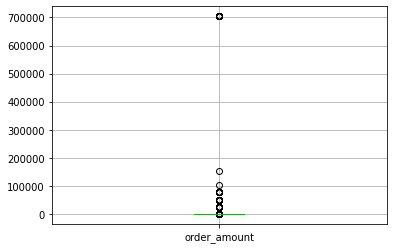

In [8]:
#Check for outliers

df.boxplot('order_amount')

From the boxplot above, we can see that there is a substantial amount of outliers present around the 700,000 order_amount value. We will then group by order values and check the counts of each datapoint.


In [9]:
df_groupby = df.groupby(['order_amount']).size()
df_outliers = df_groupby.reset_index(name='Counts').sort_values(by='order_amount', ascending = False)
df_outliers.head(20)

,order_amount,Counts
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


From the outliers table we have discovered that our high data points such as (704000, 77175, 51450, 25725) occured so many times. 
But can this be a reason for our inaccurate Average order value?

We will go into details of these high ordered values to see how these items were bought.

In [10]:
high_orders = df.loc[df['order_amount'].isin([704000, 77175, 51450, 25725])].sort_values(by='order_amount', ascending=False)
high_orders

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00.000
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00.000
4056,4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000
2969,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000
...,...,...,...,...,...,...,...
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21.438
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:25.551
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:44.830
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834


It appears the order amounts of 704000 occur at the same time each day between the same store and users. The data for order amounts of 51450 and 25725 are as well similar in trend. Mostly suspected to be bulk orders.

To better evaluate this data, we can clean some of the values. Let's try plotting only values that are the median +/- 1.5 times the interquartile range.

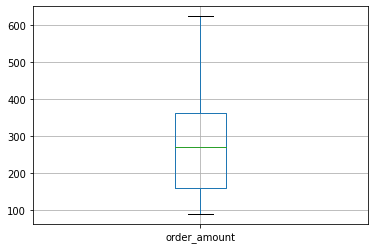

In [11]:
q1 = df.order_amount.quantile(q=0.25)
q2 = df.order_amount.quantile(q=0.5)
q3 = df.order_amount.quantile(q=0.75)
IQR = q3 - q1

Cleaned_df = df[(df.order_amount < q2 + IQR * 1.5) & (df.order_amount > q2 - IQR * 1.5)]
Cleaned_df.boxplot(column='order_amount')

In [12]:
#checking the suggested solution
Cleaned_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4738.000000,4738.000000,4738.000000,4738.000000,4738.00000
mean,2500.866399,49.770367,850.325876,283.814268,1.89848
std,1444.266056,29.149727,86.802461,132.061996,0.86278
min,1.000000,1.000000,700.000000,90.000000,1.00000
25%,1247.250000,24.000000,776.000000,161.000000,1.00000
50%,2502.500000,50.000000,851.000000,272.000000,2.00000
75%,3755.750000,74.000000,926.000000,362.000000,2.00000
max,5000.000000,100.000000,999.000000,624.000000,5.00000


1A.Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

Answer: From the solution proferred above, we believe that calculating the AOV with values that are the median +/- 1.5 times the interquartile range.



1B. What metric would you report for this dataset?

Answer: Personally, I can see that from the cleaned data the distribution is somewhat skewed towards the lower values. Hence, I will suggest the MEDIAN metric be used to report for this dataset.

1C. What is its value?

Looking at the description of the cleaned data above we can tell that the value is $272. It also shows that the standard deviation is 132.06, which seems like a much more reasonable result.

2A. How many orders were shipped by Speedy Express in total?

Answer: 54 orders were shipped by Speedy Express in total


Query: SELECT distinct count (*) FROM [Orders]a join [Shippers]b on (a.ShipperID = b.ShipperID)
join [Customers]c on (a.CustomerID = c.CustomerID)
where b.ShipperName = 'Speedy Express'


2B.What is the last name of the employee with the most orders?

Answer : Peacock is the last name of the employee with the most orders


Query : select a.EmployeeID,count(OrderID),a.lastname,a.firstname from [Employees]a join [Orders]b on (a.EmployeeID = b.EmployeeID) group by a.lastname order by count(OrderID) Desc


2C.What product was ordered the most by customers in Germany?
Answer: 
Boston Crab Meat

Query : SELECT a.ProductID, a.ProductName, SUM(Quantity) AS TotalQuantity
FROM Products a, OrderDetails b, Customers  c, Orders d  
WHERE c.Country = "Germany" AND b.OrderID = d.OrderID AND b.ProductID = a.ProductID AND c.CustomerID = d.CustomerID
GROUP BY a.ProductID
ORDER BY TotalQuantity DESC
